# Exploratory Data Analysis & Data Preparation
Data files:
* Part 1: Exploratory Data Analysis - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/white_wine_quality.csv
* Part 2: Data Preparation - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/shoppers.csv

## Requirements
* Part 1: Exploratory Data Analysis
  * Load data and examine data
  * Generate summary statistics
  * Generate insights on the dependent variable
  * Display correlation matrix for all variables
* Part 2: Data Preparation
  * Load data and examine data
  * Identify missing values and use SimpleImputer to replace missing values
  * Generate one-hot encodings
  * Perform label encoding
  * Standardize independent variables

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 02/13/24 15:03:11


## Part 1: Exploratory Data Analysis

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data file (white_wine_quality.csv) into a dataframe
#  NOTE: field separator is ';'
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/white_wine_quality.csv', sep=';')

### Examine data

In [4]:
# Display dataframe shape
df.shape

(4898, 12)

In [5]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Generate summary statistics on data

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Generate insights on the dependent variable
#### Dependent  variable is quality

In [7]:
# Display the distinct classes
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
# Display the distribution counts for each class
df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

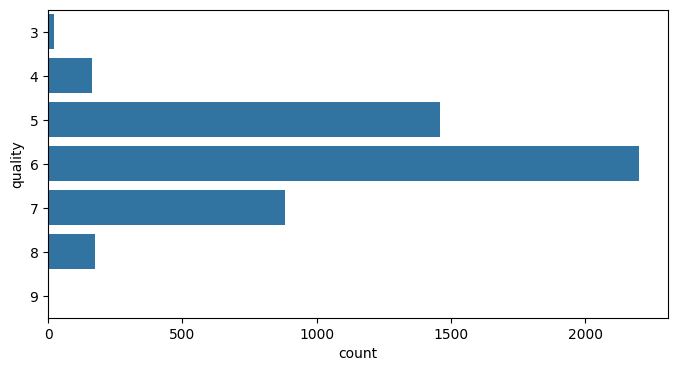

In [9]:
# Graph (i.e. bar graph) the distribution of the classes
plt.figure(figsize=[8,4])
sns.countplot(y='quality', data=df)
plt.show()

### Display the correlation matrix for all variables

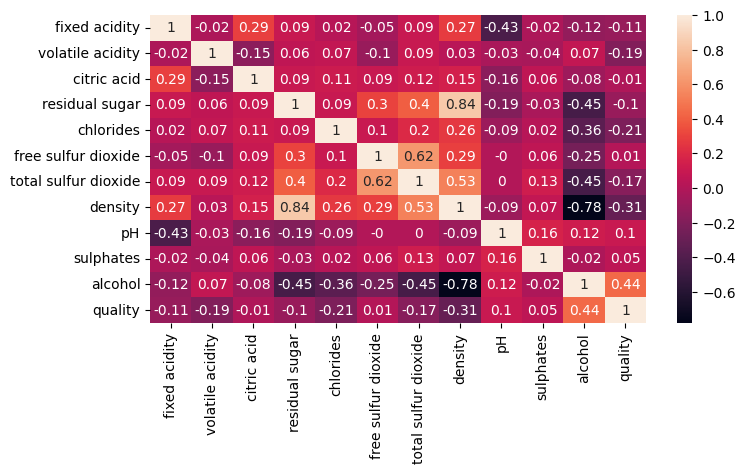

In [10]:
# Display full correlation matrix
plt.figure(figsize=(8,4))
# Calculate the linear relationships between the variables
correlation_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(correlation_matrix, annot = True)
plt.show()

## Part 2: Data Preparation

### NOTE: Final dataframe must be ready for model training (i.e. all numeric and scaled values)

### Import libraries

In [11]:
from sklearn.impute import SimpleImputer             # for handling missing data
from sklearn.preprocessing import LabelEncoder       # for encoding label data
from sklearn.preprocessing import StandardScaler     # for standardizing the data

### Load data
* Independent variables: Region, Age, Income
* Dependent variable: Online_Shopper

In [12]:
# Read data file (shoppers.csv) into a dataframe
df2 = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/shoppers.csv')

### Examine data

In [13]:
# Display dataframe
df2

,Region,Age,Income,Online_Shopper
0,India,49.0,NaN,No
1,Brazil,32.0,57600.0,Yes
2,USA,NaN,NaN,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,NaN,No
9,India,NaN,80400.0,Yes


### Identify missing values

In [14]:
# Check for null values
df2.isnull().sum()

Region            0
Age               3
Income            4
Online_Shopper    0
dtype: int64

In [15]:
# Identify rows with missing values
df2[df2.isnull().any(axis=1)]

,Region,Age,Income,Online_Shopper
0,India,49.0,NaN,No
2,USA,NaN,NaN,No
4,USA,45.0,NaN,Yes
6,Brazil,NaN,62400.0,No
8,USA,55.0,NaN,No
9,India,NaN,80400.0,Yes


### Impute missing values

#### Use the SimpleImputer to replace ALL missing values

In [16]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [17]:
tmp_1 = df2[['Age', 'Income']]
imp_mean.fit(tmp_1)

SimpleImputer()

In [18]:
# The transform method applies the imputation to the data by replacing the missing values 
#  with the computed statistics
tmp_2 = imp_mean.transform(tmp_1)

In [19]:
# The fit_transform method is a convenience method that combines the functionality of
#  the fit and transform methods
tmp_3 = imp_mean.fit_transform(tmp_1)

In [20]:
np.array_equal(tmp_2, tmp_3)

True

In [21]:
tmp_3

array([[4.90000000e+01, 7.30000000e+04],
       [3.20000000e+01, 5.76000000e+04],
       [4.52857143e+01, 7.30000000e+04],
       [4.30000000e+01, 7.32000000e+04],
       [4.50000000e+01, 7.30000000e+04],
       [4.00000000e+01, 6.96000000e+04],
       [4.52857143e+01, 6.24000000e+04],
       [5.30000000e+01, 9.48000000e+04],
       [5.50000000e+01, 7.30000000e+04],
       [4.52857143e+01, 8.04000000e+04]])

In [22]:
# Convert the transformed data into a dataframe
df3 = pd.DataFrame(tmp_3,
                  columns=['Age', 'Income'])
df3.head(10)

,Age,Income
0,49.000000,73000.0
1,32.000000,57600.0
2,45.285714,73000.0
3,43.000000,73200.0
4,45.000000,73000.0
5,40.000000,69600.0
6,45.285714,62400.0
7,53.000000,94800.0
8,55.000000,73000.0
9,45.285714,80400.0


In [23]:
df3['Region'] = df2['Region']
df3['Online_Shopper'] = df2['Online_Shopper']
df3.head(10)

,Age,Income,Region,Online_Shopper
0,49.000000,73000.0,India,No
1,32.000000,57600.0,Brazil,Yes
2,45.285714,73000.0,USA,No
3,43.000000,73200.0,Brazil,No
4,45.000000,73000.0,USA,Yes
5,40.000000,69600.0,India,Yes
6,45.285714,62400.0,Brazil,No
7,53.000000,94800.0,India,Yes
8,55.000000,73000.0,USA,No
9,45.285714,80400.0,India,Yes


### Recheck missing values

In [24]:
# Check for null values
df3.isnull().sum()

Age               0
Income            0
Region            0
Online_Shopper    0
dtype: int64

In [25]:
# Check for rows with any missing values
df3[df3.isnull().any(axis=1)]

,Age,Income,Region,Online_Shopper


### Display updated dataframe

In [26]:
df3

,Age,Income,Region,Online_Shopper
0,49.000000,73000.0,India,No
1,32.000000,57600.0,Brazil,Yes
2,45.285714,73000.0,USA,No
3,43.000000,73200.0,Brazil,No
4,45.000000,73000.0,USA,Yes
5,40.000000,69600.0,India,Yes
6,45.285714,62400.0,Brazil,No
7,53.000000,94800.0,India,Yes
8,55.000000,73000.0,USA,No
9,45.285714,80400.0,India,Yes


### Generate one-hot encodings for Region column

In [27]:
# List unique values for Region
df3['Region'].unique()

array(['India', 'Brazil', 'USA'], dtype=object)

In [28]:
df3.head()

,Age,Income,Region,Online_Shopper
0,49.000000,73000.0,India,No
1,32.000000,57600.0,Brazil,Yes
2,45.285714,73000.0,USA,No
3,43.000000,73200.0,Brazil,No
4,45.000000,73000.0,USA,Yes


In [29]:
# Generate encodings for Region
df3_ohe1 = pd.get_dummies(df3['Region'])
df3_ohe1.head()

,Brazil,India,USA
0,False,True,False
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [30]:
df3_ohe1 = df3_ohe1.astype(int)
df3_ohe1.head()

,Brazil,India,USA
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [31]:
# Join dataframe with Region-encoded dataframe
df4 = df3.join(df3_ohe1)
df4.head()

,Age,Income,Region,Online_Shopper,Brazil,India,USA
0,49.000000,73000.0,India,No,0,1,0
1,32.000000,57600.0,Brazil,Yes,1,0,0
2,45.285714,73000.0,USA,No,0,0,1
3,43.000000,73200.0,Brazil,No,1,0,0
4,45.000000,73000.0,USA,Yes,0,0,1


In [32]:
# Drop Region column since it is now encoded
df4.drop(['Region'], axis=1, inplace=True)
df4.head()

,Age,Income,Online_Shopper,Brazil,India,USA
0,49.000000,73000.0,No,0,1,0
1,32.000000,57600.0,Yes,1,0,0
2,45.285714,73000.0,No,0,0,1
3,43.000000,73200.0,No,1,0,0
4,45.000000,73000.0,Yes,0,0,1


### Encode labels

In [33]:
# Encode Online Shopper column
le = LabelEncoder()
df4['Online_Shopper']= le.fit_transform(df4['Online_Shopper'])
df4.head(10)

,Age,Income,Online_Shopper,Brazil,India,USA
0,49.000000,73000.0,0,0,1,0
1,32.000000,57600.0,1,1,0,0
2,45.285714,73000.0,0,0,0,1
3,43.000000,73200.0,0,1,0,0
4,45.000000,73000.0,1,0,0,1
5,40.000000,69600.0,1,0,1,0
6,45.285714,62400.0,0,1,0,0
7,53.000000,94800.0,1,0,1,0
8,55.000000,73000.0,0,0,0,1
9,45.285714,80400.0,1,0,1,0


### Standardize independent variables

In [34]:
df4['Age'].head()

0    49.000000
1    32.000000
2    45.285714
3    43.000000
4    45.000000
Name: Age, dtype: float64

In [35]:
col_min = df4['Age'].min()
col_max = df4['Age'].max()
col_mean = df4['Age'].mean()
col_stddev = df4['Age'].std()

In [36]:
print(f"Age: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

Age: min=32.0, max=55.0, mean=45.285714285714285, std_dev=6.475840326668651


In [37]:
# Standardization: The fit_transform method scales each feature such that 
#  the column's mean will be approximately 0 AND
#  the column's standard deviation will be approximately 1 (unit variance)
scaler = StandardScaler()
df4['Age'] = scaler.fit_transform(np.array(df4[['Age']]))
df4['Age'].head()

0    0.604586
1   -2.162557
2    0.000000
3   -0.372053
4   -0.046507
Name: Age, dtype: float64

In [38]:
col_min = df4['Age'].min()
col_max = df4['Age'].max()
col_mean = df4['Age'].mean()
col_stddev = df4['Age'].std()

In [39]:
print(f"Age: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

Age: min=-2.1625567939590664, max=1.581224322464694, mean=1.1102230246251565e-16, std_dev=1.0540925533894596


In [40]:
df4['Income'].head()

0    73000.0
1    57600.0
2    73000.0
3    73200.0
4    73000.0
Name: Income, dtype: float64

In [41]:
col_min = df4['Income'].min()
col_max = df4['Income'].max()
col_mean = df4['Income'].mean()
col_stddev = df4['Income'].std()

In [42]:
print(f"Income: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

Income: min=57600.0, max=94800.0, mean=73000.0, std_dev=9950.54437371812


In [43]:
scaler = StandardScaler()
df4['Income'] = scaler.fit_transform(np.array(df4[['Income']]))
df4['Income'].head()

0    0.000000
1   -1.631371
2    0.000000
3    0.021187
4    0.000000
Name: Income, dtype: float64

In [44]:
col_min = df4['Income'].min()
col_max = df4['Income'].max()
col_mean = df4['Income'].mean()
col_stddev = df4['Income'].std()

In [45]:
print(f"Income: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

Income: min=-1.631370577580978, max=2.309342765666579, mean=1.1102230246251566e-17, std_dev=1.0540925533894596


In [46]:
df4['Brazil'].head()

0    0
1    1
2    0
3    1
4    0
Name: Brazil, dtype: int64

In [47]:
col_min = df4['Brazil'].min()
col_max = df4['Brazil'].max()
col_mean = df4['Brazil'].mean()
col_stddev = df4['Brazil'].std()

In [48]:
print(f"Brazil: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

Brazil: min=0, max=1, mean=0.3, std_dev=0.48304589153964794


In [49]:
scaler = StandardScaler()
df4['Brazil'] = scaler.fit_transform(np.array(df4[['Brazil']]))
df4['Brazil'].head()

0   -0.654654
1    1.527525
2   -0.654654
3    1.527525
4   -0.654654
Name: Brazil, dtype: float64

In [50]:
col_min = df4['Brazil'].min()
col_max = df4['Brazil'].max()
col_mean = df4['Brazil'].mean()
col_stddev = df4['Brazil'].std()

In [51]:
print(f"Brazil: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

Brazil: min=-0.6546536707079772, max=1.5275252316519468, mean=-2.2204460492503132e-17, std_dev=1.0540925533894598


In [52]:
df4['India'].head()

0    1
1    0
2    0
3    0
4    0
Name: India, dtype: int64

In [53]:
col_min = df4['India'].min()
col_max = df4['India'].max()
col_mean = df4['India'].mean()
col_stddev = df4['India'].std()

In [54]:
print(f"India: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

India: min=0, max=1, mean=0.4, std_dev=0.5163977794943222


In [55]:
scaler = StandardScaler()
df4['India'] = scaler.fit_transform(np.array(df4[['India']]))
df4['India'].head()

0    1.224745
1   -0.816497
2   -0.816497
3   -0.816497
4   -0.816497
Name: India, dtype: float64

In [56]:
col_min = df4['India'].min()
col_max = df4['India'].max()
col_mean = df4['India'].mean()
col_stddev = df4['India'].std()

In [57]:
print(f"India: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

India: min=-0.8164965809277261, max=1.2247448713915892, mean=-2.2204460492503132e-17, std_dev=1.0540925533894598


In [58]:
df4['USA'].head()

0    0
1    0
2    1
3    0
4    1
Name: USA, dtype: int64

In [59]:
col_min = df4['USA'].min()
col_max = df4['USA'].max()
col_mean = df4['USA'].mean()
col_stddev = df4['USA'].std()

In [60]:
print(f"USA: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

USA: min=0, max=1, mean=0.3, std_dev=0.4830458915396479


In [61]:
scaler = StandardScaler()
df4['USA'] = scaler.fit_transform(np.array(df4[['USA']]))
df4['USA'].head()

0   -0.654654
1   -0.654654
2    1.527525
3   -0.654654
4    1.527525
Name: USA, dtype: float64

In [62]:
col_min = df4['USA'].min()
col_max = df4['USA'].max()
col_mean = df4['USA'].mean()
col_stddev = df4['USA'].std()

In [63]:
print(f"USA: min={col_min}, max={col_max}, mean={col_mean}, std_dev={col_stddev}")

USA: min=-0.6546536707079772, max=1.5275252316519468, mean=-1.1102230246251566e-17, std_dev=1.0540925533894598


### Display entire final dataframe

In [64]:
df4

,Age,Income,Online_Shopper,Brazil,India,USA
0,0.604586,0.000000,0,-0.654654,1.224745,-0.654654
1,-2.162557,-1.631371,1,1.527525,-0.816497,-0.654654
2,0.000000,0.000000,0,-0.654654,-0.816497,1.527525
3,-0.372053,0.021187,0,1.527525,-0.816497,-0.654654
4,-0.046507,0.000000,1,-0.654654,-0.816497,1.527525
5,-0.860372,-0.360173,1,-0.654654,1.224745,-0.654654
6,0.000000,-1.122891,0,1.527525,-0.816497,-0.654654
7,1.255678,2.309343,1,-0.654654,1.224745,-0.654654
8,1.581224,0.000000,0,-0.654654,-0.816497,1.527525
9,0.000000,0.783905,1,-0.654654,1.224745,-0.654654
